In [1]:

import numpy as np 
import pandas as pd 




In [2]:
df = pd.read_csv('chatgpt1.csv')

In [3]:
df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [5]:
df.shape

(50001, 20)

In [6]:
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'Permalink', 'User',
       'Outlinks', 'CountLinks', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'ConversationId', 'Language', 'Source', 'Media',
       'QuotedTweet', 'MentionedUsers', 'hashtag', 'hastag_counts'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Datetime              0
Tweet Id              0
Text                  0
Username              0
Permalink             0
User                  0
Outlinks          30059
CountLinks        30059
ReplyCount            0
RetweetCount          0
LikeCount             0
QuoteCount            0
ConversationId        0
Language              0
Source                0
Media             40499
QuotedTweet       46438
MentionedUsers    32832
hashtag               0
hastag_counts         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Datetime        50001 non-null  object
 1   Tweet Id        50001 non-null  int64 
 2   Text            50001 non-null  object
 3   Username        50001 non-null  object
 4   Permalink       50001 non-null  object
 5   User            50001 non-null  object
 6   Outlinks        19942 non-null  object
 7   CountLinks      19942 non-null  object
 8   ReplyCount      50001 non-null  int64 
 9   RetweetCount    50001 non-null  int64 
 10  LikeCount       50001 non-null  int64 
 11  QuoteCount      50001 non-null  int64 
 12  ConversationId  50001 non-null  int64 
 13  Language        50001 non-null  object
 14  Source          50001 non-null  object
 15  Media           9502 non-null   object
 16  QuotedTweet     3563 non-null   object
 17  MentionedUsers  17169 non-null  object
 18  hashta

In [77]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [13]:
most_frequent_values(df)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
Total,50001,50001,50001,50001,50001,50001,19942,19942,50001,50001,50001,50001,50001,50001,50001,9502,3563,17169,50001,50001
Most frequent item,2023-01-23 17:11:13+00:00,1617156270871699456,@chatgpt_issac AI,translation_ja,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/translation_ja,['https://www.ft.com/content/7229ba86-142a-49f...,['https://t.co/xegxY3jDom'],0,0,0,0,1617162355112124421,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/GRDecter/status/1617162355...,"[User(username='GRDecter', id=1281457267582177...",[],0
Frequence,8,1,164,60,1,60,149,19,36736,42416,27141,47665,264,32076,17814,20,209,332,36414,36414
Percent from total,0.016,0.002,0.328,0.12,0.002,0.12,0.747,0.095,73.471,84.83,54.281,95.328,0.528,64.151,35.627,0.21,5.866,1.934,72.827,72.827


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df['Username'].unique()

array(['mochico0123', 'Caput_LupinumSG', 'ciffi', ..., 'marcopiccinini',
       'EuniceNyandat', 'AmericoSD_69'], dtype=object)

In [39]:
df['hastag_counts'].unique()

array([ 0,  1,  2,  4, 11,  5,  3, 10, 15,  8, 12,  9,  6,  7, 13, 14, 16,
       23, 20, 18, 21, 24, 22, 25, 17, 28, 19])

In [40]:
df['hastag_counts'].value_counts()

0     36414
1      5516
2      2772
3      1944
4      1150
5       651
6       396
7       295
8       229
9       124
10       98
13       76
11       69
12       51
15       44
16       43
14       41
18       25
17       14
23        9
19        9
25        8
21        7
20        7
24        6
22        2
28        1
Name: hastag_counts, dtype: int64

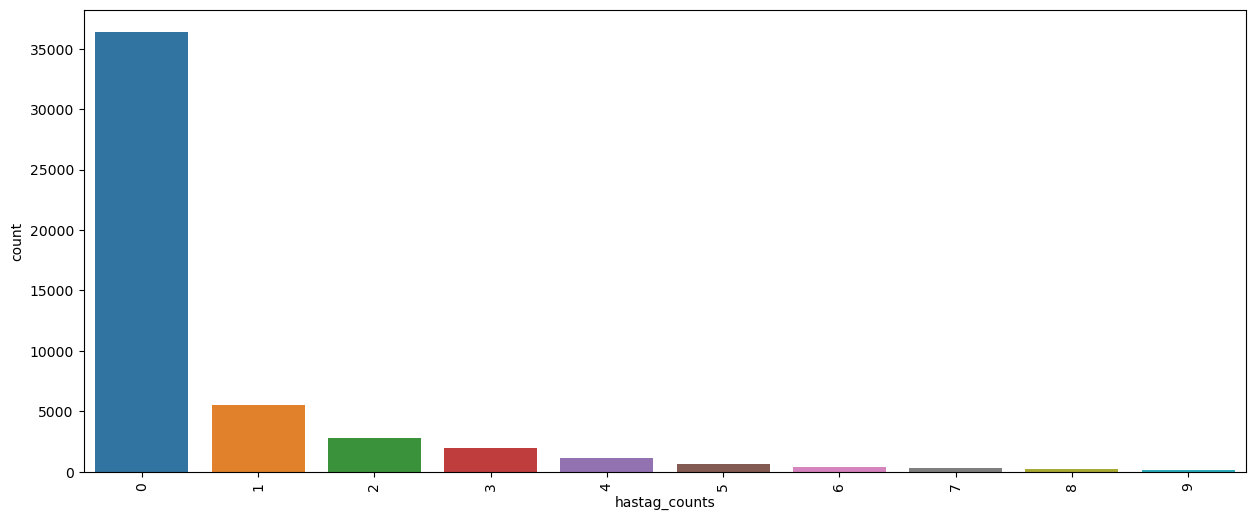

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='hastag_counts', order=df["hastag_counts"].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.show()

In [42]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [80]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 

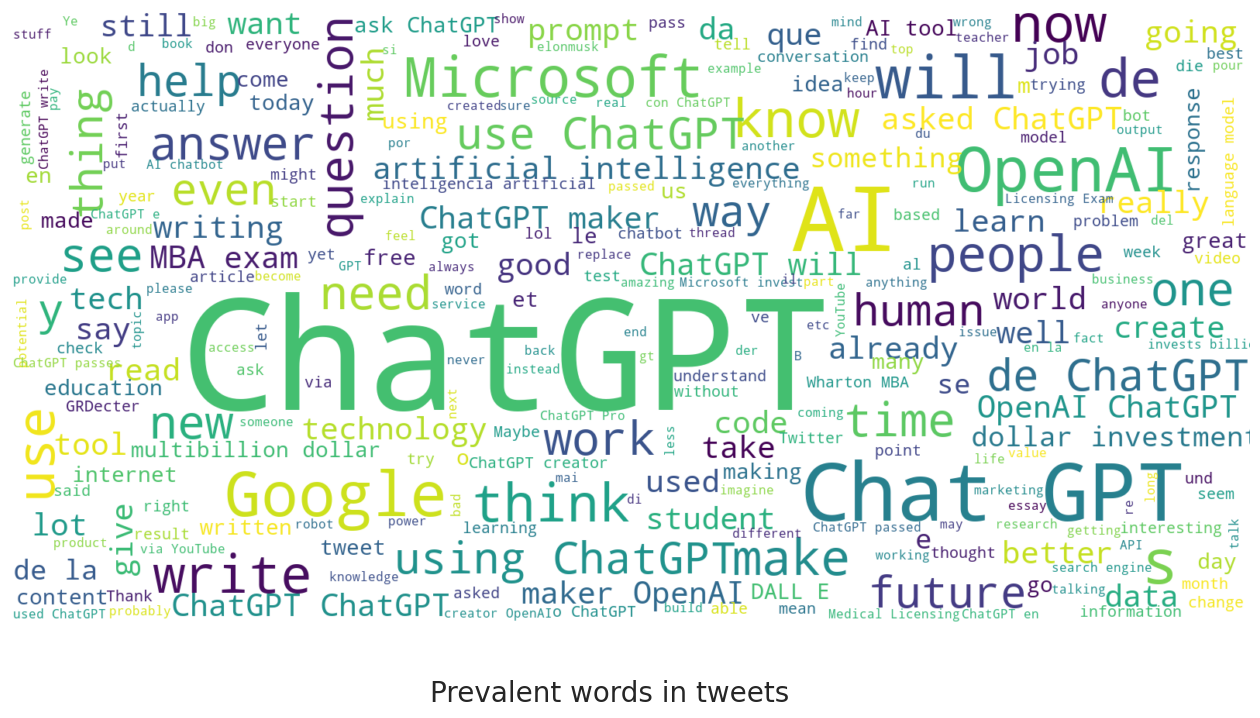

In [81]:
show_wordcloud(df['Text'], title = 'Prevalent words in tweets')

In [82]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [83]:
df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['hour'] = df['Datetime'].dt.hour
df['minute'] = df['Datetime'].dt.minute
df['dayofyear'] = df['Datetime'].dt.dayofyear
df['date_only'] = df['Datetime'].dt.date

In [84]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [85]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

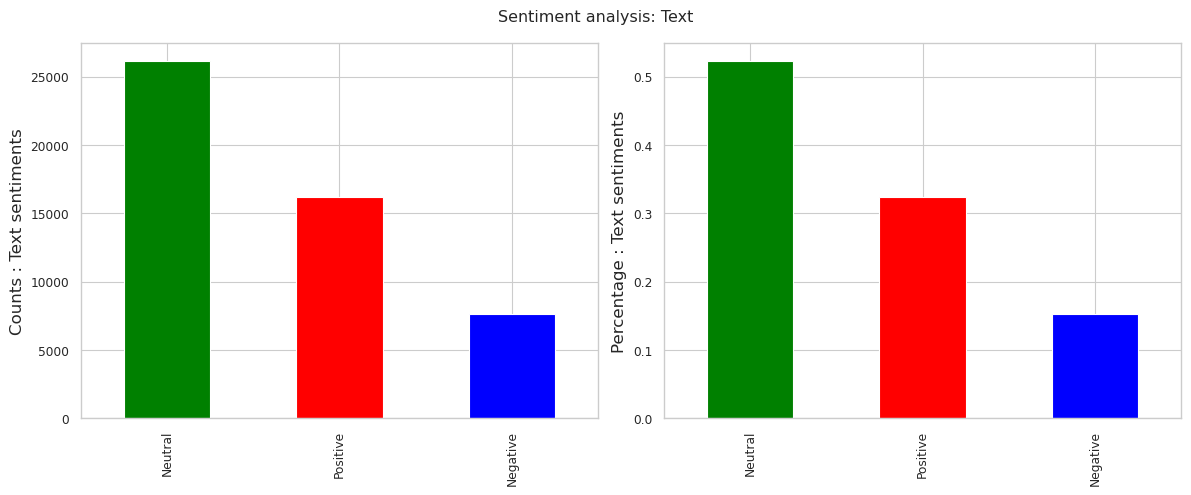

In [86]:
df['text_sentiment'] = df['Text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'Text')

In [90]:
df['labels'] = df['Text'].apply(lambda x: find_sentiment(x)) 

In [91]:
df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,year,month,day,dayofweek,hour,minute,dayofyear,date_only,text_sentiment,labels
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,...,2023,1,22,6,13,44,22,2023-01-22,Neutral,Neutral
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,...,2023,1,22,6,13,44,22,2023-01-22,Positive,Positive
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,...,2023,1,22,6,13,44,22,2023-01-22,Negative,Negative
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,...,2023,1,22,6,13,44,22,2023-01-22,Neutral,Neutral
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,...,2023,1,22,6,13,44,22,2023-01-22,Neutral,Neutral


In [92]:
df['Username'].value_counts()

translation_ja    60
SaveToNotion      47
trandanhmmo       44
richardkimphd     43
VeilleCyber3      38
                  ..
masayume_32        1
WRoughSketch       1
ayazfarooqui       1
Technology_GD      1
AmericoSD_69       1
Name: Username, Length: 38433, dtype: int64

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

def username_to_vector(username, vocab=None):
    # Create CountVectorizer object with given vocabulary
    vectorizer = CountVectorizer(vocabulary=vocab)
    
    # Convert username to bag-of-words vector
    username_vector = vectorizer.transform([username]).toarray()
    
    # Return vector representation of username
    return username_vector.flatten()

# Example usage
username = "john doe"
vocab = ["john", "doe", "jane"]
username_vector = username_to_vector(username, df['Username'].unique())
print(username_vector)

[0 0 0 ... 0 0 0]


In [100]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
encoder = OrdinalEncoder()
le=LabelEncoder()

df['Username_vector'] = encoder.fit_transform(df[['Username']])

In [101]:
df['labels_vec'] = le.fit_transform(df['labels'])

In [102]:
df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,day,dayofweek,hour,minute,dayofyear,date_only,text_sentiment,labels,Username_vector,labels_vec
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,...,22,6,13,44,22,2023-01-22,Neutral,Neutral,30026.0,1
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,...,22,6,13,44,22,2023-01-22,Positive,Positive,3179.0,2
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,...,22,6,13,44,22,2023-01-22,Negative,Negative,21010.0,0
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,...,22,6,13,44,22,2023-01-22,Neutral,Neutral,16783.0,1
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,...,22,6,13,44,22,2023-01-22,Neutral,Neutral,58.0,1


In [104]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

username_vectors =  vectorizer.fit_transform(df['Username'])

df['Username_vec2'] = username_vectors

In [106]:
nnz = username_vectors.getnnz()
nnz

50001

In [107]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

nb_classifier.fit(username_vectors, df['labels_vec'])

MultinomialNB()

In [109]:
from sklearn.metrics import accuracy_score

y_pred = nb_classifier.predict(username_vectors)

accuracy = accuracy_score(df['labels_vec'], y_pred)

In [110]:
print('accuracy = ',accuracy)

accuracy =  0.8111637767244655


In [111]:
df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,day,dayofweek,hour,minute,dayofyear,date_only,text_sentiment,labels,Username_vector,labels_vec
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,...,22,6,13,44,22,2023-01-22,Neutral,Neutral,30026.0,1
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,...,22,6,13,44,22,2023-01-22,Positive,Positive,3179.0,2
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,...,22,6,13,44,22,2023-01-22,Negative,Negative,21010.0,0
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,...,22,6,13,44,22,2023-01-22,Neutral,Neutral,16783.0,1
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,...,22,6,13,44,22,2023-01-22,Neutral,Neutral,58.0,1


In [112]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

hashtag_vectors =  vectorizer.fit_transform(df['hashtag'])


In [113]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

nb_classifier.fit(hashtag_vectors, df['labels_vec'])

MultinomialNB()

In [119]:
from sklearn.metrics import accuracy_score

y_pred = nb_classifier.predict(hashtag_vectors)

accuracy2 = accuracy_score(df['labels_vec'], y_pred)



In [121]:
print('accuracy = ',accuracy2)

accuracy =  0.7679086418271635


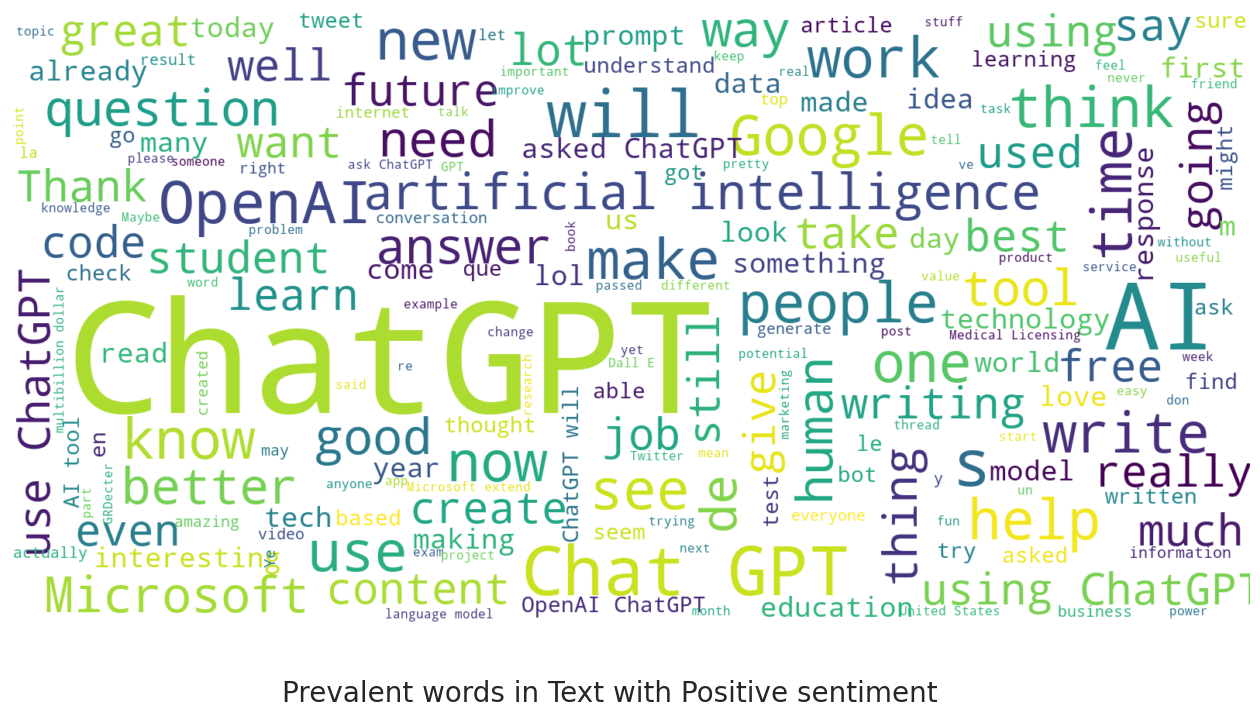

In [87]:
show_wordcloud(df.loc[df['text_sentiment']=="Positive", 'Text'], title = 'Prevalent words in Text with Positive sentiment', mask=None)

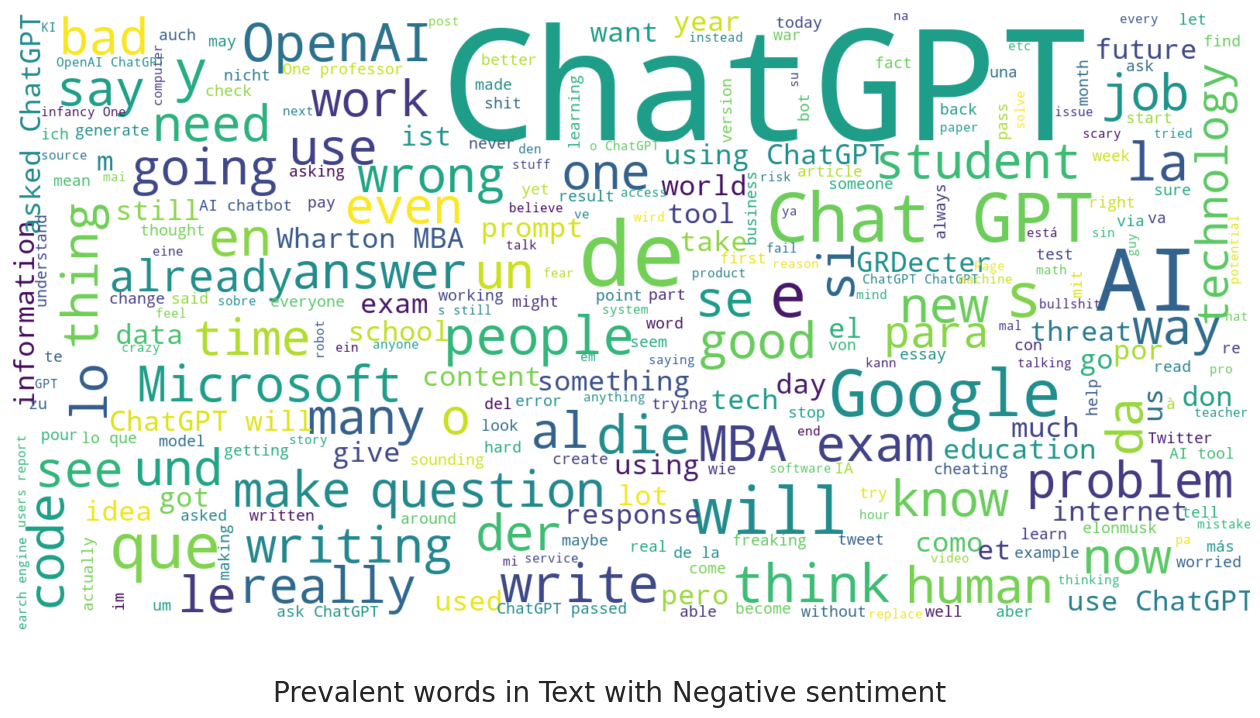

In [88]:
show_wordcloud(df.loc[df['text_sentiment']=="Negative", 'Text'], title = 'Prevalent words in Text with Negative sentiment', mask=None)

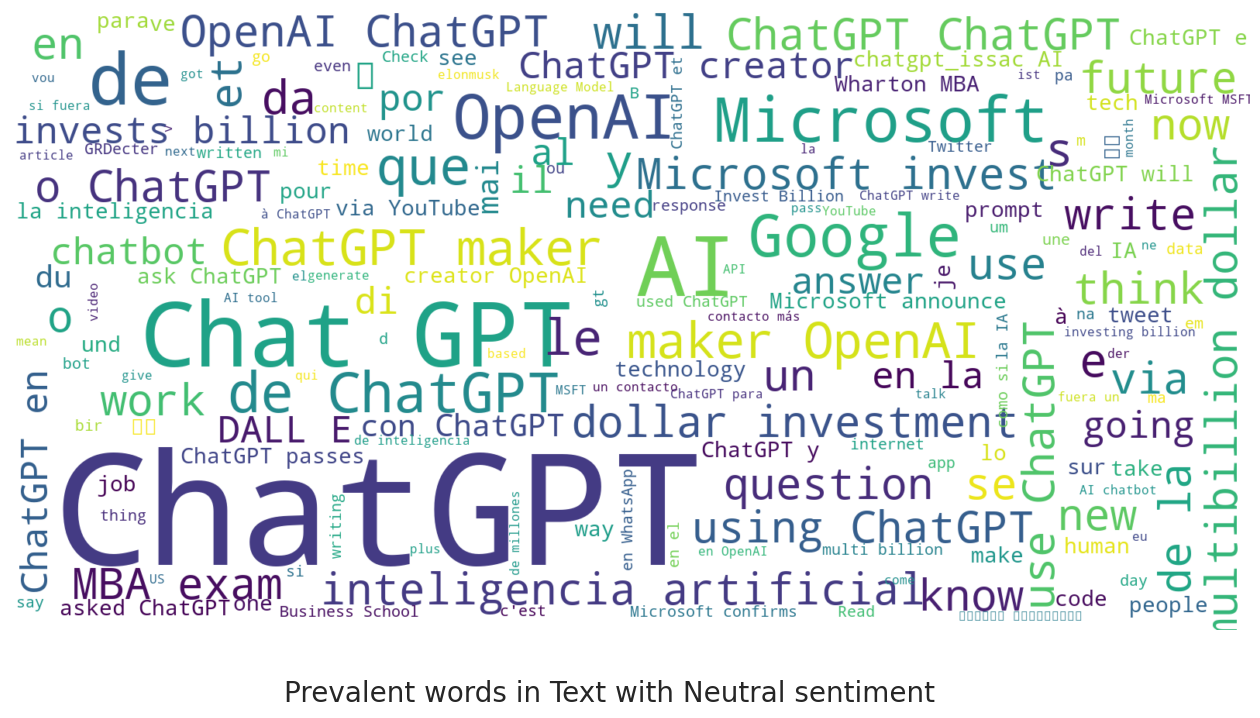

In [89]:
show_wordcloud(df.loc[df['text_sentiment']=="Neutral", 'Text'], title = 'Prevalent words in Text with Neutral sentiment', mask=None)